In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Visa_2Lakh_Dataset.csv')
print(data.head())

   app_id    app_date decision_date  country visa_category  \
0  100001  2024-11-06    2024-12-10   Canada          Work   
1  100002  2024-02-27    2024-04-23   Canada       Student   
2  100003  2023-01-20    2023-02-16  Germany       Student   
3  100004  2023-12-21    2024-01-13   Canada       Student   
4  100005  2023-02-23    2023-04-12       UK      Business   

   processing_time_days  delay_status  normalized_time  
0                    34  Normal Delay        -0.503060  
1                    56    High Delay         1.354966  
2                    27  Normal Delay        -1.094249  
3                    23  Normal Delay        -1.432072  
4                    48    High Delay         0.679320  


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load data
data = pd.read_csv('Visa_2Lakh_Dataset.csv')

# Features & target
X = data[['country', 'visa_category', 'delay_status']]
y = data['processing_time_days']

# Convert categorical → numerical
X = pd.get_dummies(X)

# Split data (with random_state for same results)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model (add tuning)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", round(mae, 2))

MAE: 5.35


In [6]:
# New input
new_data = pd.DataFrame({
    'country': ['India'],
    'visa_category': ['Student'],
    'delay_status': ['Normal Delay']
})

# Convert same format
new_data = pd.get_dummies(new_data)
new_data = new_data.reindex(columns=X.columns, fill_value=0)

# Predict
prediction = model.predict(new_data)

print("Estimated Processing Time:", round(prediction[0]), "days")

Estimated Processing Time: 27 days


In [7]:
# Range (±5 days)
lower = int(prediction[0] - 5)
upper = int(prediction[0] + 5)

print(f"Estimated Processing Time: {lower} to {upper} days")

Estimated Processing Time: 22 to 32 days


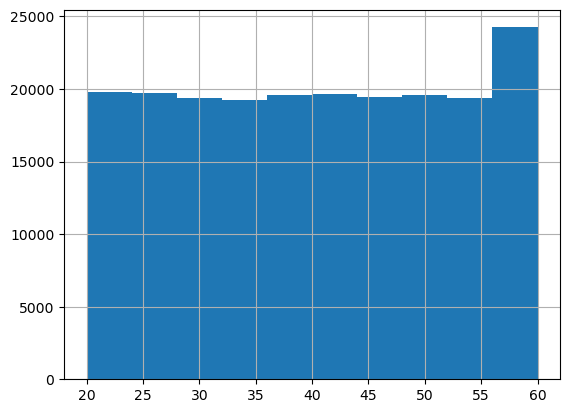

In [8]:
import matplotlib.pyplot as plt

data['processing_time_days'].hist()
plt.show()

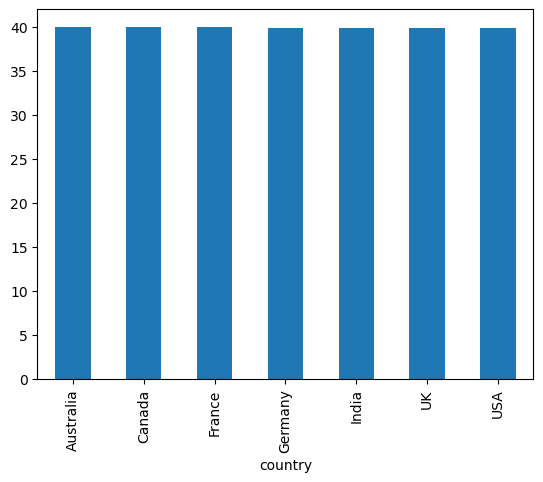

In [9]:
data.groupby('country')['processing_time_days'].mean().plot(kind='bar')
plt.show()

In [10]:
data['app_date'] = pd.to_datetime(data['app_date'])
data['month'] = data['app_date'].dt.month

In [11]:
data['month'] = data['app_date'].dt.month